In [38]:
# dependencies
# import PyTorch
import torch
from torch import nn

from torch.utils.data import DataLoader

# import torchvision 
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# import matplotlib for visualization
import matplotlib.pyplot as plt

# import numpy
import numpy as np

In [2]:
# load data
# Setup training data
train_data = datasets.FashionMNIST(
    root="local_training_data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="local_training_data",
    train=False, # get test data
    download=True,
    transform=ToTensor()
)

In [3]:
# See first training sample
image, label = train_data[0]
# The shape of the image tensor is [1, 28, 28] or more specifically: [color_channels=1, height=28, width=28]
print(type(image), image.shape)
print(type(label))

<class 'torch.Tensor'> torch.Size([1, 28, 28])
<class 'int'>


In [4]:
# float values between 0.0  and 1.0
image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [5]:
# How many samples are there?
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [6]:
type(train_data)

torchvision.datasets.mnist.FashionMNIST

In [7]:
# see classes
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

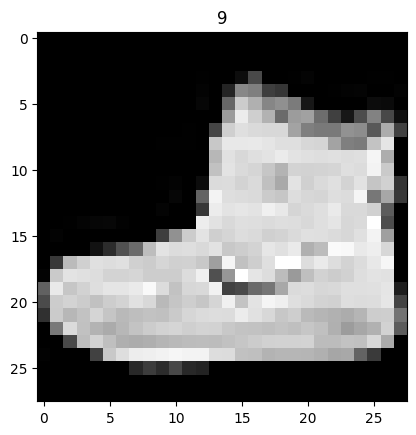

In [8]:
# get first sample
image, label = train_data[0]
print(f"Image shape: {image.shape}")
# squeeze the first dimension (1)
image = image.squeeze()
plt.imshow(image, cmap="gray") # image shape is [1, 28, 28] (colour channels, height, width)
plt.title(label)

37542
46067
46876
46414
10026
27335
38620
11924
14950
57113
31378
29014
47210
18954
18231
47572


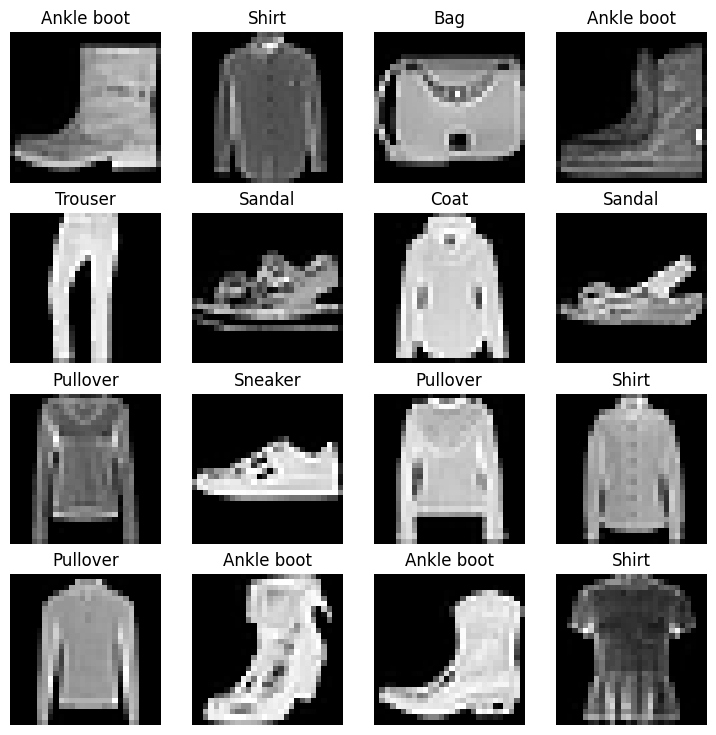

In [9]:
# plot more images
torch.manual_seed(42)
# visualize some images
fig = plt.figure(figsize=(9, 9))
# 4x4 images
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    print(random_idx)
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    img = img.squeeze()
    plt.imshow(img, cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

In [10]:
# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data, # dataset to turn into iterable
    batch_size=BATCH_SIZE, # how many samples per batch? 
    shuffle=True # shuffle data every epoch?
)

test_dataloader = DataLoader(test_data,
    batch_size=BATCH_SIZE,
    shuffle=False # don't necessarily have to shuffle the testing data
)

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}") 
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x138e9f4c0>, <torch.utils.data.dataloader.DataLoader object at 0x1395594c0>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [11]:
# let's inspect a batch
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [12]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [13]:
# Model
# It follows the typical structure of a convolutional neural network:
# Input layer -> [Convolutional layer -> activation layer -> pooling layer] -> Output layer
# Where the contents of [Convolutional layer -> activation layer -> pooling layer] can be upscaled and repeated multiple times, 
# depending on requirements.

# Create a convolutional neural network model
class FashionMNISTConvnet(nn.Module):
    def __init__(self, input_channel: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.convnet_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_channel, 
                      out_channels=hidden_units, 
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.convnet_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            # No softmax here, as it's included in the CrossEntropyLoss
            nn.Linear(in_features=hidden_units*7*7, out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.convnet_block_1(x)
        #print(x.shape)
        x = self.convnet_block_2(x)
        #print(x.shape)
        x = self.classifier(x)
        #print(x.shape)
        return x

In [14]:
model = FashionMNISTConvnet(input_channel=1, hidden_units=10, output_shape=len(class_names)).to(device)
model

FashionMNISTConvnet(
  (convnet_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (convnet_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [15]:
# let's run the model
torch.manual_seed(42)

# Create sample batch of random numbers with same size as image batch
images = torch.randn(size=(32, 1, 28, 28)) # [batch_size, color_channels, height, width]
test_image = images[0] # get a single image for testing
print(f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]")

Image batch shape: torch.Size([32, 1, 28, 28]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]


In [16]:
preds = model(images)
print(len(preds))
print(preds[0])

32
tensor([-0.0444, -0.0445, -0.0105, -0.0025,  0.0780,  0.0103, -0.0396,  0.0926,
        -0.0483, -0.0172], grad_fn=<SelectBackward0>)


In [17]:
# Setup a loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)

In [20]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_target, y_pred):
    correct = torch.eq(y_target, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

In [24]:
def fit_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    # set to device
    model.to(device)
    # Training
    model.train()    
    for X, y in data_loader:
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_logits = model(X)
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels

        # 2. Calculate loss
        loss = loss_fn(y_logits, y)
        train_loss += loss
        train_acc += accuracy_fn(y, y_pred)

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")
    return (train_loss.detach().item(), train_acc)

def evaluate_model(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    val_loss, val_acc = 0, 0
    # set to device
    model.to(device)
    # put model in eval mode
    model.eval()
    # Turn on inference context manager
    with torch.inference_mode(): 
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)
            
            # 1. Forward pass
            y_logits = model(X)
            y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
            
            # 2. Calculate loss and accuracy
            val_loss += loss_fn(y_logits, y)
            val_acc += accuracy_fn(y, y_pred)
        
        # Adjust metrics and print out
        val_loss /= len(data_loader)
        val_acc /= len(data_loader)
        print(f"Test loss: {val_loss:.5f} | Test accuracy: {val_acc:.2f}%\n")
        return (val_loss.detach().item(), val_acc)

In [27]:
# Train model
epochs = 3
results = {
    "train_loss": [],
    "train_acc": [],
    "val_loss": [],
    "val_acc": []
    
}
for epoch in range(epochs):
    print(f"Epoch: {epoch}\n---------")
    train_loss, train_acc = fit_model(data_loader=train_dataloader,
        model=model, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    val_loss, val_acc = evaluate_model(data_loader=test_dataloader,
        model=model,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )
    # print(train_loss, type(train_loss))
    # print(train_acc, type(train_acc))
    # print(val_loss, type(val_loss))
    # print(val_acc, type(val_acc))    
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["val_loss"].append(val_loss)
    results["val_acc"].append(val_acc)

Epoch: 0
---------
Train loss: 0.26461 | Train accuracy: 90.31%
Test loss: 0.29973 | Test accuracy: 89.02%

Epoch: 1
---------
Train loss: 0.25972 | Train accuracy: 90.50%
Test loss: 0.31813 | Test accuracy: 88.79%

Epoch: 2
---------
Train loss: 0.25486 | Train accuracy: 90.69%
Test loss: 0.28441 | Test accuracy: 90.10%



In [28]:
print(results)

{'train_loss': [0.26460668444633484, 0.2597225308418274, 0.2548640966415405], 'train_acc': [90.31166666666667, 90.50333333333333, 90.68666666666667], 'val_loss': [0.2997291386127472, 0.3181333839893341, 0.284410685300827], 'val_acc': [89.01757188498402, 88.7879392971246, 90.09584664536742]}


In [32]:
def plot_training_results(results):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "val_loss": [...],
             "val_acc": [...]}
    """
    loss = results["train_loss"]
    test_loss = results["val_loss"]

    accuracy = results["train_acc"]
    test_accuracy = results["val_acc"]

    epochs = range(len(results["train_loss"]))

    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label="train_loss")
    plt.plot(epochs, test_loss, label="val_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label="train_accuracy")
    plt.plot(epochs, test_accuracy, label="val_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()


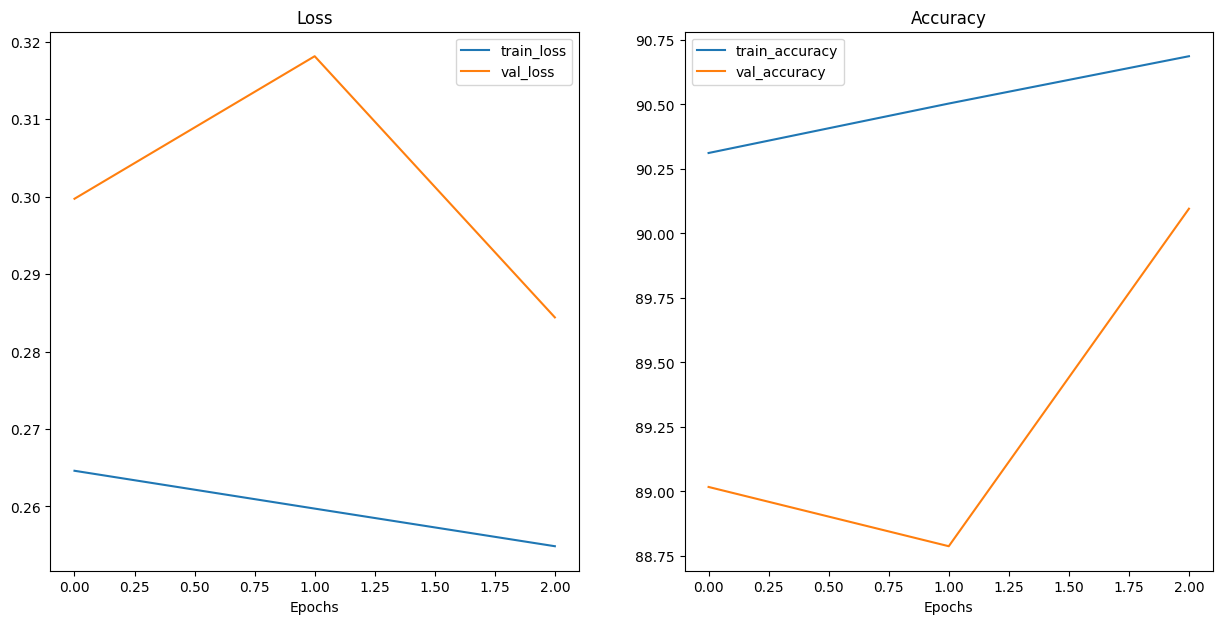

In [33]:
plot_training_results(results)

In [34]:
# evaluate the model with testing data
val_loss, val_acc = evaluate_model(data_loader=test_dataloader,
    model=model,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)
print(val_loss, val_acc)

Test loss: 0.28441 | Test accuracy: 90.10%

0.284410685300827 90.09584664536742


In [35]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for x in data:
            # Prepare x
            x = torch.unsqueeze(x, dim=0).to(device) # Add an extra dimension and send x to device

            # Forward pass (model outputs raw logit)
            y_logits = model(x)

            y_logits = y_logits.squeeze() # remove extra dimension
            y_prob = torch.softmax(y_logits, dim=0) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 1, so can perform on dim=0)

            # Get y_prob off GPU for further calculations
            pred_probs.append(y_prob.cpu())
            
    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [53]:
indexes = np.random.randint(0, len(test_dataloader), size=10)
print(indexes)

sample_data = []
sample_target = []
for i in indexes:
    # print(i)
    sample, target = test_data[i]
    sample_data.append(sample)
    sample_target.append(target)

print(len(sample_data))
print(type(sample_data[0]))
print(sample_data[0].shape)

[132  61 173 145 194 127 132 207 286 287]
10
<class 'torch.Tensor'>
torch.Size([1, 28, 28])


In [54]:
pred_probs = make_predictions(model, sample_data, device)

In [55]:
print(pred_probs)

tensor([[2.7722e-06, 2.6103e-09, 1.2203e-07, 4.4410e-08, 1.9220e-07, 1.1504e-01,
         1.9514e-05, 7.4022e-03, 1.8474e-04, 8.7735e-01],
        [1.6403e-05, 1.4634e-07, 1.1636e-07, 1.1873e-07, 3.3667e-08, 4.4455e-03,
         2.2600e-07, 9.6582e-01, 2.9448e-05, 2.9690e-02],
        [2.4703e-06, 9.9997e-01, 1.7905e-09, 1.5762e-05, 9.1426e-06, 3.2238e-08,
         6.7413e-07, 1.6105e-09, 2.2471e-09, 6.1722e-09],
        [6.2965e-02, 5.0203e-06, 4.3672e-03, 8.6492e-04, 2.0833e-05, 1.2078e-06,
         9.3160e-01, 2.9480e-07, 1.7617e-04, 2.7272e-07],
        [1.8317e-05, 2.8038e-04, 4.7401e-06, 9.9964e-01, 5.7962e-06, 1.3487e-05,
         1.8723e-05, 5.2626e-06, 8.5212e-06, 2.9721e-06],
        [4.7084e-04, 7.4579e-06, 2.5941e-01, 5.4827e-06, 7.1498e-01, 4.3900e-06,
         2.5099e-02, 5.2586e-07, 1.6856e-05, 7.5656e-07],
        [2.7722e-06, 2.6103e-09, 1.2203e-07, 4.4410e-08, 1.9220e-07, 1.1504e-01,
         1.9514e-05, 7.4022e-03, 1.8474e-04, 8.7735e-01],
        [3.7649e-07, 3.0245

In [57]:
# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes = pred_probs.argmax(dim=1)
print(pred_classes)
print(sample_target)

tensor([9, 7, 1, 6, 3, 4, 9, 7, 0, 7])
[9, 7, 1, 6, 3, 4, 9, 7, 6, 7]
